# Logistic Regression: Binary Classification

In [1]:
import warnings

warnings.filterwarnings("ignore")


import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")

In [3]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


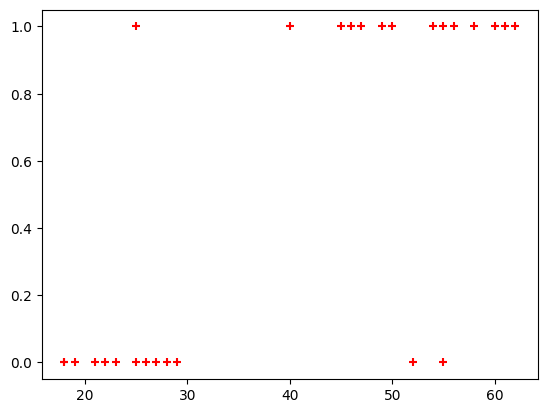

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',c='red')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [7]:
X_train

,age
16,25
4,46
10,18
14,49
18,19
9,61
12,27
7,60
21,26
5,56


In [8]:
X_test

,age
13,29
23,45
0,22
1,25
8,62
17,58


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
model.fit(X_train,y_train)

LogisticRegression()

In [11]:
X_test

,age
13,29
23,45
0,22
1,25
8,62
17,58


In [12]:
y_predicted = model.predict(X_test)

In [13]:
model.predict_proba(X_test)

array([[0.75050259, 0.24949741],
       [0.32329746, 0.67670254],
       [0.8706    , 0.1294    ],
       [0.82653737, 0.17346263],
       [0.06335149, 0.93664851],
       [0.09677166, 0.90322834]])

In [14]:
model.score(X_test,y_test)

1.0

In [15]:
y_predicted

array([0, 1, 0, 0, 1, 1], dtype=int64)

In [16]:
X_test

,age
13,29
23,45
0,22
1,25
8,62
17,58


### model.coef_ indicates value of m in y=m*x + b equation

In [17]:
model.coef_

array([[0.1149971]])

### model.intercept_ indicates value of b in y=m*x + b equation

In [18]:
model.intercept_

array([-4.43621042])

### Lets defined sigmoid function now and do the math with hand

In [19]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [20]:
def prediction_function(age):
    z = 0.042 * age -1.53  # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [21]:
age = 35
prediction_function(age)

0.4850044983805899

### 0.485 is less than 0.5 which means person with 35 age will not buy insurance

In [22]:
age= 43
prediction_function(age)

0.568565299077705

### 0.568 is more than 0.5 which means person with 43 will buy the insurance

# Logistic Regression: Multiclass Classification

In [23]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

<Figure size 640x480 with 0 Axes>

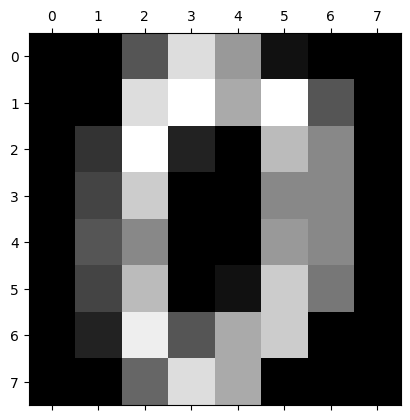

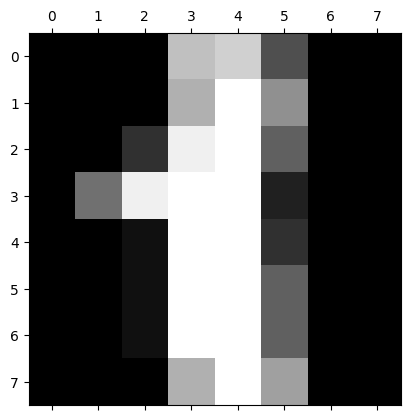

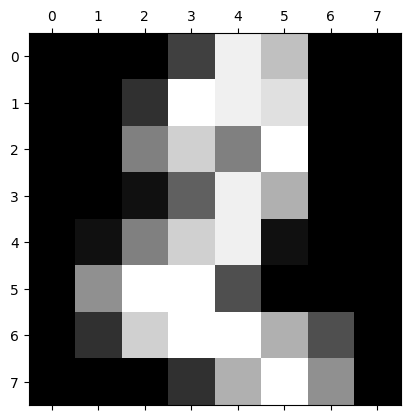

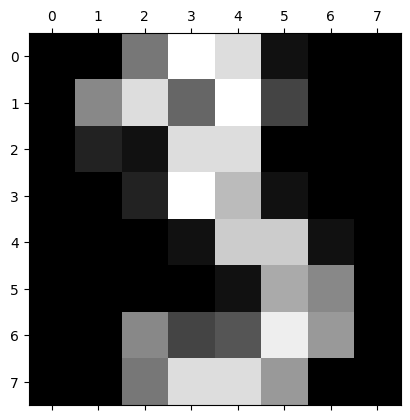

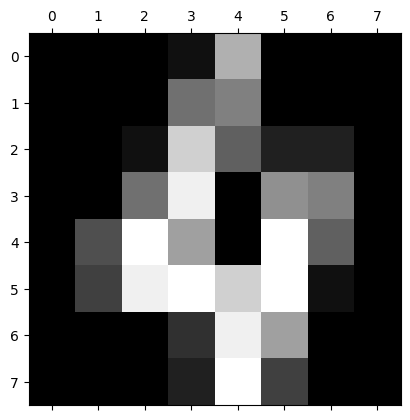

In [24]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [25]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [26]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### Create and train logistic regression model

In [27]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [30]:
model1.fit(X_train,y_train)

LogisticRegression()

### Measure accuracy of our model

In [31]:
model1.score(X_test, y_test)

0.9638888888888889

In [32]:
model1.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

## Confusion Matrix

In [33]:
y_predicted = model1.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 28,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  2],
       [ 0,  0,  0,  1,  0,  1,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 40]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

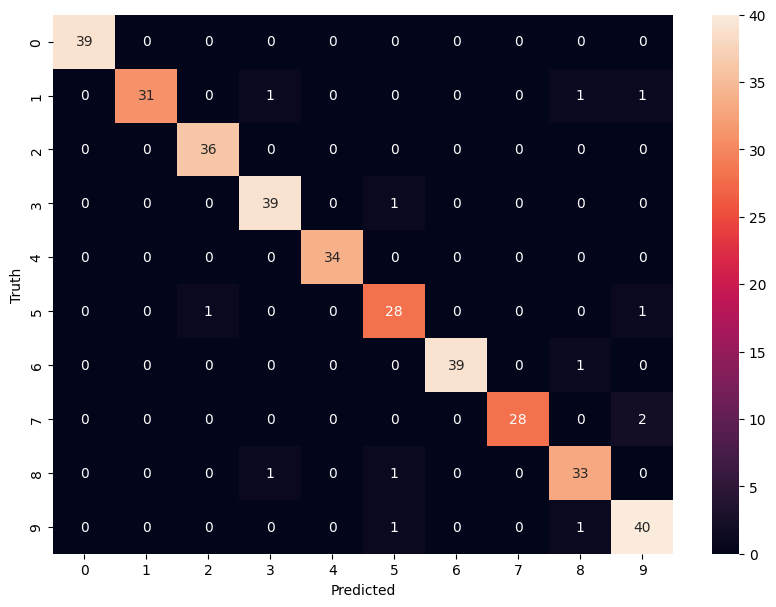

In [35]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')